In [1]:
from pyspark.sql import SparkSession

# Start Spark Session
spark = SparkSession.builder.appName("NYC_Taxi_Project").getOrCreate()

# Check Spark version
spark.version


25/03/13 14:13:59 WARN Utils: Your hostname, MacBook-Air-khxng-Chonnipha.local resolves to a loopback address: 127.0.0.1; using 10.135.128.18 instead (on interface en0)
25/03/13 14:13:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/13 14:14:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


'3.5.5'

In [2]:
df = spark.read.parquet("file:///Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/yellow_tripdata_2024-02.parquet")

# Show first 10 rows
df.show(10)


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2024-02-01 00:04:45|  2024-02-01 00:19:58|              1|         4.39|         1|                 N|          68|         236|           1|       20.5|  1.0|    0.5|      1.2

In [3]:
import pandas as pd
from IPython.display import display

# Convert Spark DataFrame to Pandas for better display
pandas_df = df.limit(100).toPandas()

# Show nicely formatted table
display(pandas_df)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-02-01 00:04:45,2024-02-01 00:19:58,1,4.39,1,N,68,236,1,20.50,1.0,0.5,1.28,0.00,1.0,26.78,2.5,0.00
1,2,2024-02-01 00:56:31,2024-02-01 01:10:53,1,7.71,1,N,48,243,1,31.00,1.0,0.5,9.00,0.00,1.0,45.00,2.5,0.00
2,2,2024-02-01 00:07:50,2024-02-01 00:43:12,2,28.69,2,N,132,261,2,70.00,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,1,2024-02-01 00:01:49,2024-02-01 00:10:47,1,1.10,1,N,161,163,1,9.30,3.5,0.5,2.85,0.00,1.0,17.15,2.5,0.00
4,1,2024-02-01 00:37:35,2024-02-01 00:51:15,1,2.60,1,N,246,79,2,15.60,3.5,0.5,0.00,0.00,1.0,20.60,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2024-02-01 00:10:01,2024-02-01 00:21:10,1,2.70,1,N,263,48,4,-14.90,-1.0,-0.5,0.00,0.00,-1.0,-19.90,-2.5,0.00
96,2,2024-02-01 00:10:01,2024-02-01 00:21:10,1,2.70,1,N,263,48,4,14.90,1.0,0.5,0.00,0.00,1.0,19.90,2.5,0.00
97,2,2024-02-01 00:28:54,2024-02-01 00:29:18,1,0.00,5,N,48,48,1,19.99,0.0,0.0,0.00,0.00,1.0,23.49,2.5,0.00
98,2,2024-02-01 00:38:53,2024-02-01 00:57:31,1,7.49,1,N,229,97,1,32.40,1.0,0.5,7.48,0.00,1.0,44.88,2.5,0.00


In [4]:
df.printSchema()


root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [5]:
df.count()


3007526

In [6]:
df.describe().show()


25/03/12 18:44:40 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
[Stage 10:>                                                         (0 + 1) / 1]

+-------+-------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------------------+------------------+--------------------+-------------------+
|summary|           VendorID|   passenger_count|    trip_distance|        RatecodeID|store_and_fwd_flag|      PULocationID|      DOLocationID|      payment_type|       fare_amount|             extra|            mta_tax|        tip_amount|      tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|        Airport_fee|
+-------+-------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------------------+------------------+--------------------+-

In [7]:
import pandas as pd
from IPython.display import display

# Convert describe() output to Pandas DataFrame
pandas_summary = df.describe().toPandas()

# Display with nice formatting
display(pandas_summary)


,summary,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,count,3007526,2821916,3007526,2821916,2821916,3007526,3007526,3007526,3007526,3007526,3007526,3007526,3007526,3007526,3007526,2821916,2821916
1,mean,1.755233371216076,1.3259381214749129,3.860858778943124,2.115167141757586,None,165.58292330639867,164.49987631029623,1.1358887670464028,18.047294390806698,1.4451079757913978,0.48341585409402943,3.3028424159922958,0.5076045959370205,0.9753655662494704,26.624413315153987,2.2664733819149827,0.1291193642900781
2,stddev,0.42994881984038497,0.8324016788080169,254.673454694914,10.068891527061238,None,63.96093112356629,69.29202738863059,0.5904848280256102,18.634542384913132,1.7974591193090663,0.11774804990474085,3.828110443900039,2.080807024892541,0.21908077962893116,22.972283346874264,0.8133738160438021,0.46872996375265713
3,min,1,0,0.0,1,N,1,1,0,-999.0,-7.5,-0.5,-140.0,-58.45,-1.0,-1000.0,-2.5,-1.75
4,max,2,9,222478.29,99,Y,265,265,4,9792.0,14.25,5.75,543.33,99.99,1.0,9792.0,2.5,1.75


In [8]:
from pyspark.sql.functions import col

df.select([col(c).isNull().alias(c) for c in df.columns]).show()


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|   false|               false|                false|          false|        false|     false|             false|       false|       false|       false|      false|false|  false|     fals

In [9]:
import pandas as pd
from pyspark.sql.functions import col

# Convert PySpark DataFrame to Pandas for better display
null_df = df.select([col(c).isNull().alias(c) for c in df.columns]).toPandas()

# Count missing values per column
null_summary = null_df.sum().to_frame(name="Missing Values")

# Display as a clean Pandas table
from IPython.display import display
display(null_summary)


,Missing Values
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,185610
trip_distance,0
RatecodeID,185610
store_and_fwd_flag,185610
PULocationID,0
DOLocationID,0
payment_type,0


In [10]:
df.limit(1000).na.drop().show()


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2024-02-01 00:04:45|  2024-02-01 00:19:58|              1|         4.39|         1|                 N|          68|         236|           1|       20.5|  1.0|    0.5|      1.2

In [11]:
print(df.columns)


['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [13]:
!pip install geohash2



In [15]:
df = spark.read.parquet("file:///Users/chonnipha/Desktop/3rd\\ year\\ second\\ sem/intern/nyc_taxi_project/data/yellow_tripdata_2024-02.parquet")
df.show(5)
print(df.columns)



+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2024-02-01 00:04:45|  2024-02-01 00:19:58|              1|         4.39|         1|                 N|          68|         236|           1|       20.5|  1.0|    0.5|      1.2

In [16]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define the mapping of location IDs to coordinates
zone_to_coords = {
    132: (40.758, -73.985),  # Midtown Manhattan
    161: (40.7128, -74.0060), # Financial District
    # Add more mappings to cover all PULocationID and DOLocationID values
}

# Define a function to get coordinates
def get_coordinates(location_id):
    coords = zone_to_coords.get(location_id, (None, None))
    if coords[0] is not None and coords[1] is not None:
        return f"{coords[0]}, {coords[1]}"  # Format as "lat, lon"
    return "Unknown"

# Convert function to Spark UDF
get_coordinates_udf = udf(get_coordinates, StringType())

# Apply to DataFrame
df = df.withColumn("pickup_coords", get_coordinates_udf(df["PULocationID"]))
df = df.withColumn("dropoff_coords", get_coordinates_udf(df["DOLocationID"]))

df.show(5, truncate=False)  # Show full output



+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+----------------+--------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|pickup_coords   |dropoff_coords|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+----------------+--------------+
|2       |2024-02-01 00:04:45 |2024-02-01 00:19:58  |1              |4.39         |1       

In [17]:
df.select("PULocationID").distinct().show()
df.select("DOLocationID").distinct().show()


+------------+
|PULocationID|
+------------+
|         148|
|         243|
|          31|
|         137|
|          85|
|          65|
|         255|
|          53|
|         133|
|          78|
|         108|
|         155|
|         211|
|         193|
|          34|
|         101|
|         126|
|         115|
|          81|
|         183|
+------------+
only showing top 20 rows

+------------+
|DOLocationID|
+------------+
|         148|
|         243|
|          31|
|         137|
|          85|
|         251|
|          65|
|         255|
|          53|
|         133|
|          78|
|         155|
|         108|
|         211|
|         193|
|          34|
|         101|
|         126|
|         115|
|          81|
+------------+
only showing top 20 rows



In [18]:
!pip install geohash2




In [19]:
import geohash2
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType


In [20]:
print(df.columns)




['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_coords', 'dropoff_coords']


In [21]:
df = spark.read.parquet("file:///Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/yellow_tripdata_2024-02.parquet")
df.show(5)


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2024-02-01 00:04:45|  2024-02-01 00:19:58|              1|         4.39|         1|                 N|          68|         236|           1|       20.5|  1.0|    0.5|      1.2

In [22]:
!pip install pyspark


In [23]:
df.printSchema()


root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [24]:
df.show(10, truncate=False)  # Show 10 rows without cutting off long text


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|2       |2024-02-01 00:04:45 |2024-02-01 00:19:58  |1              |4.39         |1         |N                 |68          |236         |1           |20.5       |1.0  |0.5    |1.28     

In [25]:
!pip install geopandas shapely


In [26]:
!mv ~/Downloads/taxi_zone_lookup.csv ~/nyc_taxi_project/
!mv ~/Downloads/taxi_zones.geojson ~/nyc_taxi_project/


mv: /Users/chonnipha/Downloads/taxi_zone_lookup.csv: No such file or directory
mv: /Users/chonnipha/Downloads/taxi_zones.geojson: No such file or directory


In [28]:
import geopandas as gpd

# Load GeoJSON file
taxi_zones = gpd.read_file("~/nyc_taxi_project/taxi_zones.geojson")

# Display first 5 rows
taxi_zones.head()


,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.695, -74.18449 40..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."


In [29]:
import requests

url = "https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv"
response = requests.get(url)

# Save the file
with open("taxi_zone_lookup.csv", "wb") as file:
    file.write(response.content)

print("Download complete! ✅")




Download complete! ✅


In [30]:
import os

# Check if the file exists
print("File exists:", os.path.exists("taxi_zone_lookup.csv"))





File exists: True


In [31]:
import os
print(os.getcwd())  # Get current working directory
print(os.listdir())  # List files in the current directory



/Users/chonnipha/nyc_taxi_project
['etl.py', 'zeppelin-0.10.1-bin-all.tgz', 'Untitled.ipynb', 'taxi_zones.geojson', 'taxi_zone_lookup.csv', 'nyc_taxi_env', '.ipynb_checkpoints', 'load_data.py', 'data']


In [32]:
!pip install geopandas shapely




In [33]:
import geopandas as gpd

# Load NYC taxi zone geometries
taxi_zones = gpd.read_file("taxi_zones.geojson")
taxi_zones = taxi_zones.to_crs("EPSG:4326")  # Convert to lat/lon if needed

print(taxi_zones.head())



          shape_area objectid       shape_leng location_id  \
0    0.0007823067885        1   0.116357453189           1   
1   0.00486634037837        2    0.43346966679           2   
2  0.000314414156821        3  0.0843411059012           3   
3  0.000111871946192        4  0.0435665270921           4   
4  0.000497957489363        5  0.0921464898574           5   

                      zone        borough  \
0           Newark Airport            EWR   
1              Jamaica Bay         Queens   
2  Allerton/Pelham Gardens          Bronx   
3            Alphabet City      Manhattan   
4            Arden Heights  Staten Island   

                                            geometry  
0  MULTIPOLYGON (((-74.18445 40.695, -74.18449 40...  
1  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...  
3  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...  
4  MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...  


In [34]:
import geopandas as gpd

# Load NYC taxi zone geometries from the geojson file
taxi_zones = gpd.read_file("taxi_zones.geojson")

# Convert to latitude/longitude coordinate system if necessary
taxi_zones = taxi_zones.to_crs("EPSG:4326")  

# Check the first few rows
print(taxi_zones.head())



          shape_area objectid       shape_leng location_id  \
0    0.0007823067885        1   0.116357453189           1   
1   0.00486634037837        2    0.43346966679           2   
2  0.000314414156821        3  0.0843411059012           3   
3  0.000111871946192        4  0.0435665270921           4   
4  0.000497957489363        5  0.0921464898574           5   

                      zone        borough  \
0           Newark Airport            EWR   
1              Jamaica Bay         Queens   
2  Allerton/Pelham Gardens          Bronx   
3            Alphabet City      Manhattan   
4            Arden Heights  Staten Island   

                                            geometry  
0  MULTIPOLYGON (((-74.18445 40.695, -74.18449 40...  
1  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...  
3  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...  
4  MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...  


In [35]:
from shapely.geometry import Point

# Function to find the nearest taxi zone for a given coordinate
def find_nearest_zone(lat, lon):
    point = Point(lon, lat)  # Note: Shapely expects (longitude, latitude)
    nearest_zone = taxi_zones.geometry.distance(point).idxmin()
    return taxi_zones.loc[nearest_zone, "zone"]  # Return the closest zone name


In [36]:
!pip install rtree


In [38]:
import pandas as pd

# Load Taxi Zone Lookup CSV
zone_lookup = pd.read_csv("~/nyc_taxi_project/taxi_zone_lookup.csv")

# Show first 5 rows to confirm it's loaded
print(zone_lookup.head())




              <?xml version="1.0" encoding="UTF-8"?>
0  <Error><Code>AccessDenied</Code><Message>Acces...


In [39]:
import geopandas as gpd

# Load NYC Taxi Zone geometries
taxi_zones = gpd.read_file("~/nyc_taxi_project/taxi_zones.geojson")

# Convert projection to latitude/longitude (EPSG 4326) if needed
taxi_zones = taxi_zones.to_crs("EPSG:4326")

# Show first few rows
print(taxi_zones.head())


          shape_area objectid       shape_leng location_id  \
0    0.0007823067885        1   0.116357453189           1   
1   0.00486634037837        2    0.43346966679           2   
2  0.000314414156821        3  0.0843411059012           3   
3  0.000111871946192        4  0.0435665270921           4   
4  0.000497957489363        5  0.0921464898574           5   

                      zone        borough  \
0           Newark Airport            EWR   
1              Jamaica Bay         Queens   
2  Allerton/Pelham Gardens          Bronx   
3            Alphabet City      Manhattan   
4            Arden Heights  Staten Island   

                                            geometry  
0  MULTIPOLYGON (((-74.18445 40.695, -74.18449 40...  
1  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...  
3  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...  
4  MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...  


In [41]:
import pandas as pd
import geopandas as gpd

# Load NYC Taxi Zone Lookup
zone_lookup = pd.read_csv("~/nyc_taxi_project/taxi_zone_lookup.csv")
print(zone_lookup.head())

# Load NYC Taxi Zone Geometries
taxi_zones = gpd.read_file("~/nyc_taxi_project/taxi_zones.geojson")
taxi_zones = taxi_zones.to_crs("EPSG:4326")  # Convert to lat/lon if needed
print(taxi_zones.head())


              <?xml version="1.0" encoding="UTF-8"?>
0  <Error><Code>AccessDenied</Code><Message>Acces...
          shape_area objectid       shape_leng location_id  \
0    0.0007823067885        1   0.116357453189           1   
1   0.00486634037837        2    0.43346966679           2   
2  0.000314414156821        3  0.0843411059012           3   
3  0.000111871946192        4  0.0435665270921           4   
4  0.000497957489363        5  0.0921464898574           5   

                      zone        borough  \
0           Newark Airport            EWR   
1              Jamaica Bay         Queens   
2  Allerton/Pelham Gardens          Bronx   
3            Alphabet City      Manhattan   
4            Arden Heights  Staten Island   

                                            geometry  
0  MULTIPOLYGON (((-74.18445 40.695, -74.18449 40...  
1  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...  
3  MULTIPOLYGON (((-73.97177 4

In [44]:
import os

file_path = "~/nyc_taxi_project/taxi_zone_lookup.csv"  # Update with the correct path if needed

if os.path.exists(os.path.expanduser(file_path)):
    print("✅ File exists!")
else:
    print("❌ File not found!")



✅ File exists!


In [45]:
with open(os.path.expanduser(file_path), "r") as f:
    print(f.readline())  # Print the first line


<?xml version="1.0" encoding="UTF-8"?>



In [48]:
import pandas as pd

file_path = "/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/taxi_zone_lookup.csv"
zone_lookup = pd.read_csv(file_path)
print(zone_lookup.head())  # Check if it's loading correctly


   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [49]:
print(zone_lookup.columns)
print(df.columns)


Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [50]:
pickup_df = df.select("PULocationID").toPandas()  # Convert PySpark DF to Pandas
pickup_df = pickup_df.merge(zone_lookup, left_on="PULocationID", right_on="LocationID", how="left")

print(pickup_df.head())  # Check if merge worked


   PULocationID  LocationID    Borough                       Zone service_zone
0            68          68  Manhattan               East Chelsea  Yellow Zone
1            48          48  Manhattan               Clinton East  Yellow Zone
2           132         132     Queens                JFK Airport     Airports
3           161         161  Manhattan             Midtown Center  Yellow Zone
4           246         246  Manhattan  West Chelsea/Hudson Yards  Yellow Zone


In [51]:
print(pickup_df.columns)  # Check if latitude & longitude are in the data


Index(['PULocationID', 'LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')


In [52]:
print(taxi_zones.columns)


Index(['shape_area', 'objectid', 'shape_leng', 'location_id', 'zone',
       'borough', 'geometry'],
      dtype='object')


In [54]:
import geopandas as gpd

# Ensure both columns have the same data type before merging
pickup_df['PULocationID'] = pickup_df['PULocationID'].astype(str)  # Convert to string
taxi_zones['location_id'] = taxi_zones['location_id'].astype(str)  # Convert to string

# Merge DataFrames
pickup_df = pickup_df.merge(
    taxi_zones[['location_id', 'geometry']],  # Select only required columns
    left_on="PULocationID", right_on="location_id", how="left"
)

print(pickup_df.head())  # Check if 'geometry' column is now in pickup_df


  PULocationID  LocationID    Borough                       Zone service_zone  \
0           68          68  Manhattan               East Chelsea  Yellow Zone   
1           48          48  Manhattan               Clinton East  Yellow Zone   
2          132         132     Queens                JFK Airport     Airports   
3          161         161  Manhattan             Midtown Center  Yellow Zone   
4          246         246  Manhattan  West Chelsea/Hudson Yards  Yellow Zone   

  location_id                                           geometry  
0          68  MULTIPOLYGON (((-74.00202 40.74044, -74.00252 ...  
1          48  MULTIPOLYGON (((-73.99118 40.75533, -73.99163 ...  
2         132  MULTIPOLYGON (((-73.82503 40.66358, -73.82486 ...  
3         161  MULTIPOLYGON (((-73.97534 40.7553, -73.97581 4...  
4         246  MULTIPOLYGON (((-74.0044 40.76267, -74.0022 40...  


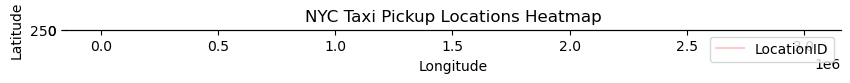

In [55]:
import matplotlib.pyplot as plt

# Create a base map
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the taxi zone boundaries
taxi_zones.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot the pickup locations
pickup_df.plot(ax=ax, color="red", alpha=0.2, markersize=5)

plt.title("NYC Taxi Pickup Locations Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [67]:
print(pickup_df.columns)


Index(['PULocationID', 'LocationID', 'Borough', 'Zone', 'service_zone',
       'location_id', 'geometry'],
      dtype='object')


In [68]:
print(pickup_df["geometry"].geom_type.value_counts())



MultiPolygon    2996713
Name: count, dtype: int64


In [69]:
import geopandas as gpd

# แปลง geometry ให้เป็นจุดศูนย์กลาง
pickup_df["geometry"] = pickup_df["geometry"].centroid

# ตรวจสอบประเภท geometry ใหม่
print(pickup_df["geometry"].geom_type.value_counts())  # ควรแสดง "Point"


/var/folders/hm/11_9m7cn1sg3lxccgqb183z40000gn/T/ipykernel_76840/1389111782.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pickup_df["geometry"] = pickup_df["geometry"].centroid


Point    2996713
Name: count, dtype: int64


In [70]:
pickup_df["longitude"] = pickup_df["geometry"].x
pickup_df["latitude"] = pickup_df["geometry"].y

# ตรวจสอบค่าพิกัด
print(pickup_df[["longitude", "latitude"]].head())


   longitude   latitude
0 -73.999917  40.748428
1 -73.989845  40.762253
2 -73.786533  40.646985
3 -73.977698  40.758028
4 -74.004015  40.753309


In [71]:
print(pickup_df.head())  # Check the first few rows
print(pickup_df.dtypes)  # Confirm data types
print(pickup_df.crs)  # Ensure correct CRS (should be EPSG:4326)


  PULocationID  LocationID    Borough                       Zone service_zone  \
0           68          68  Manhattan               East Chelsea  Yellow Zone   
1           48          48  Manhattan               Clinton East  Yellow Zone   
2          132         132     Queens                JFK Airport     Airports   
3          161         161  Manhattan             Midtown Center  Yellow Zone   
4          246         246  Manhattan  West Chelsea/Hudson Yards  Yellow Zone   

  location_id                    geometry  longitude   latitude  
0          68  POINT (-73.99992 40.74843) -73.999917  40.748428  
1          48  POINT (-73.98984 40.76225) -73.989845  40.762253  
2         132  POINT (-73.78653 40.64698) -73.786533  40.646985  
3         161   POINT (-73.9777 40.75803) -73.977698  40.758028  
4         246  POINT (-74.00402 40.75331) -74.004015  40.753309  
PULocationID      object
LocationID         int64
Borough           object
Zone              object
service_zone     

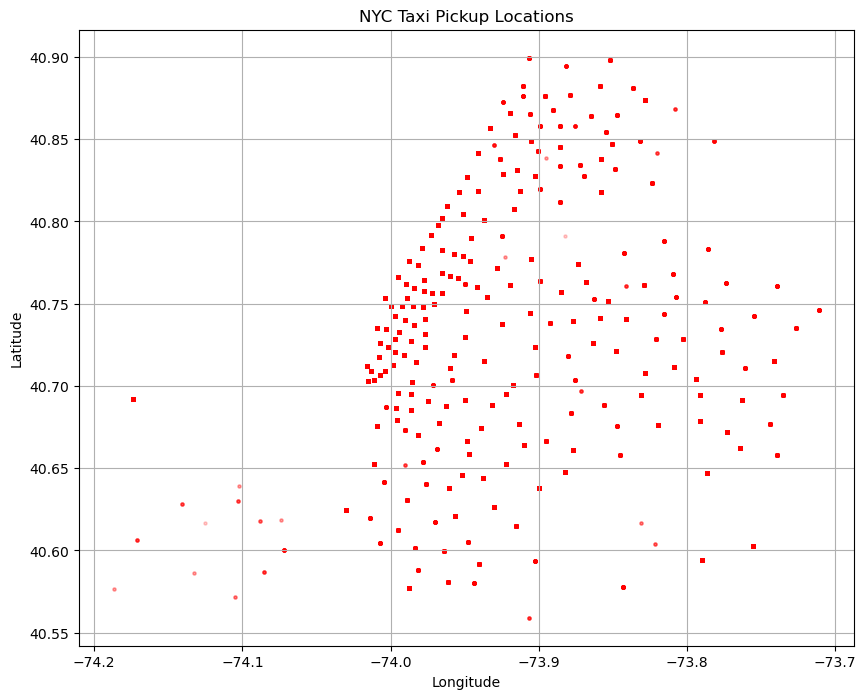

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(pickup_df["longitude"], pickup_df["latitude"], alpha=0.2, s=5, color="red")
plt.title("NYC Taxi Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


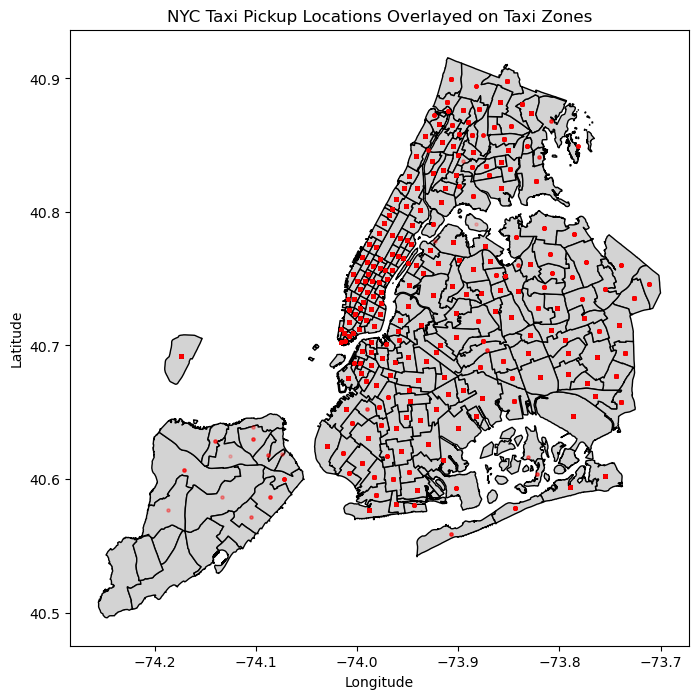

In [73]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the NYC taxi zones
taxi_zones.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot pickup locations
pickup_df.plot(ax=ax, color="red", alpha=0.2, markersize=5)

plt.title("NYC Taxi Pickup Locations Overlayed on Taxi Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


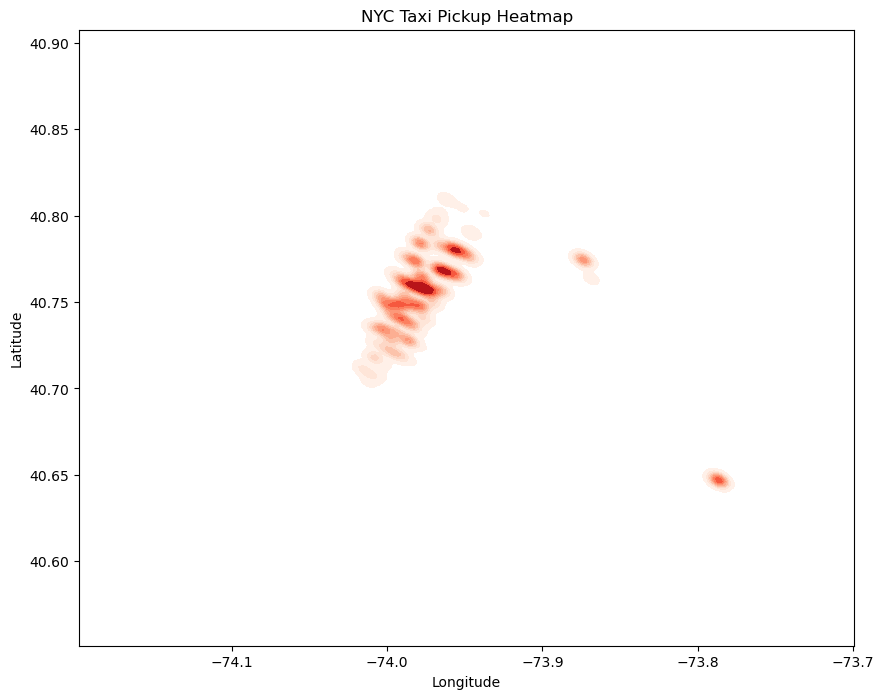

In [76]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.kdeplot(x=pickup_df["longitude"], y=pickup_df["latitude"], cmap="Reds", fill=True)
plt.title("NYC Taxi Pickup Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [77]:
top_pickups = pickup_df["PULocationID"].value_counts().head(10)
print(top_pickups)


PULocationID
161    147086
237    140800
236    134000
132    126800
162    105938
230    102279
186    100415
142     97253
239     90849
163     89182
Name: count, dtype: int64


In [81]:
pickup_df.to_csv("processed_pickups.csv", index=False)



In [83]:
pickup_df["PULocationID"] = pickup_df["PULocationID"].astype(str)
zone_lookup["LocationID"] = zone_lookup["LocationID"].astype(str)


In [84]:
top_pickups = pickup_df["PULocationID"].value_counts().reset_index()
top_pickups.columns = ["PULocationID", "count"]
top_pickups = top_pickups.merge(zone_lookup, left_on="PULocationID", right_on="LocationID", how="left")
print(top_pickups[["Zone", "Borough", "count"]])


                            Zone        Borough   count
0                 Midtown Center      Manhattan  147086
1          Upper East Side South      Manhattan  140800
2          Upper East Side North      Manhattan  134000
3                    JFK Airport         Queens  126800
4                   Midtown East      Manhattan  105938
..                           ...            ...     ...
249    Saint George/New Brighton  Staten Island       2
250                    Stapleton  Staten Island       2
251  Heartland Village/Todt Hill  Staten Island       2
252                  Westerleigh  Staten Island       1
253                Rikers Island          Bronx       1

[254 rows x 3 columns]


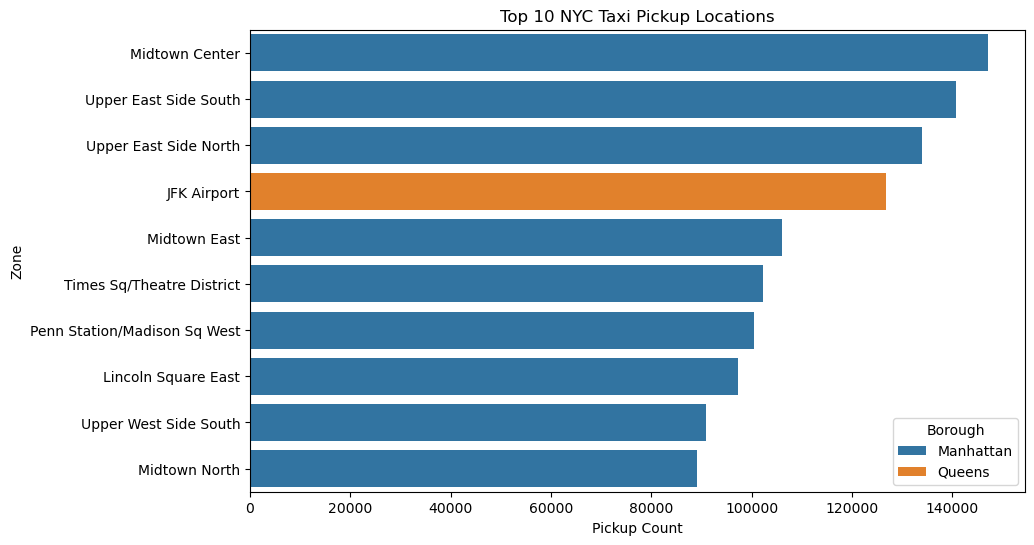

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_pickups.head(10), x="count", y="Zone", hue="Borough", dodge=False)
plt.title("Top 10 NYC Taxi Pickup Locations")
plt.xlabel("Pickup Count")
plt.ylabel("Zone")
plt.show()


In [87]:
print(pickup_df.columns)


Index(['PULocationID', 'LocationID', 'Borough', 'Zone', 'service_zone',
       'location_id', 'geometry', 'longitude', 'latitude'],
      dtype='object')


In [106]:
import os
print(os.getcwd())  # This shows the current working directory





/Users/chonnipha/nyc_taxi_project


In [108]:
import os
os.chdir("/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project")
df = pd.read_csv("taxi_zone_lookup.csv")


In [109]:
import os
print(os.path.exists("/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/taxi_zone_lookup.csv"))


True


In [110]:
import pandas as pd

# Load the taxi zone lookup file
zone_lookup = pd.read_csv("taxi_zone_lookup.csv")

# Display column names and first few rows
print(zone_lookup.columns)
print(zone_lookup.head())


Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')
   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [112]:
# Check data types
print(pickup_df.dtypes)
print(zone_lookup.dtypes)


PULocationID        object
LocationID_x         int64
Borough_x           object
Zone_x              object
service_zone_x      object
location_id         object
geometry          geometry
longitude          float64
latitude           float64
LocationID_y        object
Borough_y           object
Zone_y              object
service_zone_y      object
dtype: object
LocationID      object
Borough         object
Zone            object
service_zone    object
dtype: object


In [114]:
# Step 5: Drop redundant columns
pickup_df = pickup_df.drop(columns=["location_id", "Borough_y", "Zone_y", "service_zone_y"], errors="ignore")

# Step 6: Rename columns for clarity (if needed)
pickup_df.rename(columns={
    "Borough": "Borough",
    "Zone": "Zone",
    "Service Zone": "Service Zone"
}, inplace=True)

# Step 7: Final check
print(pickup_df.dtypes)
print(pickup_df.head())


PULocationID     object
Borough          object
Zone             object
Service Zone     object
longitude       float64
latitude        float64
dtype: object
  PULocationID    Borough                       Zone Service Zone  longitude  \
0           68  Manhattan               East Chelsea  Yellow Zone -73.999917   
1           48  Manhattan               Clinton East  Yellow Zone -73.989845   
2          132     Queens                JFK Airport     Airports -73.786533   
3          161  Manhattan             Midtown Center  Yellow Zone -73.977698   
4          246  Manhattan  West Chelsea/Hudson Yards  Yellow Zone -74.004015   

    latitude  
0  40.748428  
1  40.762253  
2  40.646985  
3  40.758028  
4  40.753309  


In [115]:
top_pickups = pickup_df["Zone"].value_counts().head(10)
print(top_pickups)


Zone
Midtown Center                  147086
Upper East Side South           140800
Upper East Side North           134000
JFK Airport                     126800
Midtown East                    105938
Times Sq/Theatre District       102279
Penn Station/Madison Sq West    100415
Lincoln Square East              97253
Upper West Side South            90849
Midtown North                    89182
Name: count, dtype: int64


In [118]:
!pip install folium


In [119]:
import folium
from folium.plugins import HeatMap

# Create a map centered around NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add heatmap
HeatMap(data=pickup_df[["latitude", "longitude"]].dropna(), radius=10).add_to(m)

# Save map as an HTML file
m.save("nyc_pickup_heatmap.html")


In [1]:
import openai
print(openai.__version__)  # Should be 0.28.0 or 0.27.0


0.28.0


In [14]:
sk-8749a8081b464535952d22fd6bb993c8

SyntaxError: invalid decimal literal (3639047003.py, line 1)

In [15]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests

# Set your API key
API_KEY = "sk-8749a8081b464535952d22fd6bb993c8"

# Define the API endpoint
url = "https://api.deepseek.com/v1/chat/completions"

# Prepare the request payload
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

data = {
    "model": "deepseek-chat",
    "messages": [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What is the average wait time for a taxi in Queens at 7 PM?"}
    ]
}

# Send the request
response = requests.post(url, headers=headers, json=data)

# Print the response
print(response.json())


{'id': '0672b52e-bc5c-46ae-96a3-189047380225', 'object': 'chat.completion', 'created': 1741835612, 'model': 'deepseek-chat', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'The average wait time for a taxi in Queens at 7 PM can vary depending on several factors, including the specific location within Queens, the day of the week, weather conditions, and current demand for taxis. \n\nIn general, during peak hours like 7 PM, you might expect to wait anywhere from 5 to 15 minutes for a taxi in a busy area. However, in less busy areas or during adverse weather conditions, the wait time could be longer.\n\nFor the most accurate and up-to-date information, you might want to use a ride-hailing app like Uber or Lyft, which can provide real-time estimates of wait times based on current demand and driver availability in your area. Additionally, traditional taxi services may have their own apps or phone numbers where you can check wait times.'}, 'logprobs': None, 'finish_reas

In [5]:
import requests
import json

# Set your API key
API_KEY = "sk-8749a8081b464535952d22fd6bb993c8"

# Define the API endpoint
url = "https://api.deepseek.com/v1/chat/completions"

# Prepare the request payload
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

data = {
    "model": "deepseek-chat",
    "messages": [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What is the average wait time for a taxi in Queens at 7 PM?"}
    ]
}

# Send the request
response = requests.post(url, headers=headers, json=data)

# Format and print response nicely
response_json = response.json()
print(json.dumps(response_json, indent=4, ensure_ascii=False))  # Pretty-print JSON


{
    "id": "a0e33938-5e15-45b2-bc2b-a17eb0e6440b",
    "object": "chat.completion",
    "created": 1741835806,
    "model": "deepseek-chat",
    "choices": [
        {
            "index": 0,
            "message": {
                "role": "assistant",
                "content": "The average wait time for a taxi in Queens at 7 PM can vary depending on several factors, including the specific location within Queens, the day of the week, weather conditions, and local events. Generally, during peak hours like 7 PM, you might expect to wait anywhere from 5 to 15 minutes for a taxi, but this can be longer in areas with high demand or limited taxi availability.\n\nFor a more accurate estimate, you might want to use a ride-hailing app like Uber or Lyft, which can provide real-time wait times based on current demand and driver availability in your area. Additionally, traditional taxi services may have their own apps or hotlines that can give you an idea of wait times.\n\nIf you're in a partic

In [6]:
import requests

# Set your DeepSeek API Key
API_KEY = "sk-8749a8081b464535952d22fd6bb993c8"

# Define the API endpoint
url = "https://api.deepseek.com/v1/chat/completions"

# Function to interact with DeepSeek AI
def ask_deepseek(question):
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }
    
    # AI Prompt
    data = {
        "model": "deepseek-chat",
        "messages": [
            {"role": "system", "content": "You are an AI assistant trained to provide insights on NYC taxi data."},
            {"role": "user", "content": question}
        ]
    }

    response = requests.post(url, headers=headers, json=data)
    
    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return f"Error: {response.json()}"

# Example queries
print(ask_deepseek("What is the busiest taxi zone at 8 PM?"))
print(ask_deepseek("What is the average fare from JFK to Manhattan?"))


To determine the busiest taxi zone at 8 PM, we would typically analyze trip data from the NYC Taxi & Limousine Commission (TLC) dataset, focusing on the number of pickups or drop-offs in each taxi zone around that time. However, since I don't have access to real-time or the most recent data, I can provide general insights based on historical trends.

Historically, some of the busiest taxi zones in NYC at 8 PM include:

1. **Midtown Manhattan**: Areas around Times Square, Penn Station, and the Theater District are often bustling with activity in the evening.
2. **Lower Manhattan**: Financial District and areas near popular evening destinations like the South Street Seaport.
3. **Airports**: JFK and LaGuardia airports often see high activity around this time due to evening flights.

For the most accurate and up-to-date information, you would need to analyze the latest TLC trip data, filtering for trips around 8 PM and aggregating by taxi zone. Let me know if you'd like guidance on how to

In [7]:
import requests

# Set your DeepSeek API Key
API_KEY = "sk-8749a8081b464535952d22fd6bb993c8"

# Define the API endpoint
url = "https://api.deepseek.com/v1/chat/completions"

# Function to interact with DeepSeek AI
def ask_deepseek(question):
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }
    
    # AI Prompt
    data = {
        "model": "deepseek-chat",
        "messages": [
            {"role": "system", "content": "You are an AI assistant trained to provide insights on NYC taxi data."},
            {"role": "user", "content": question}
        ]
    }

    response = requests.post(url, headers=headers, json=data)
    
    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return f"Error: {response.json()}"

# ✅ Interactive Mode: Let Users Ask Questions
while True:
    user_query = input("\n🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit): ")
    if user_query.lower() in ["exit", "quit"]:
        print("👋 Goodbye!")
        break
    
    response = ask_deepseek(user_query)
    print("\n🔹 DeepSeek AI Response:\n📌", response, "\n")



🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit):   What is the busiest taxi zone at 8 PM?



🔹 DeepSeek AI Response:
📌 To determine the busiest taxi zone at 8 PM in NYC, we would typically analyze trip data from the NYC Taxi & Limousine Commission (TLC) dataset, focusing on pickups and drop-offs around that time. However, without access to real-time or specific historical data, I can provide general insights based on trends:

1. **Midtown Manhattan**: Areas like Times Square, Penn Station, and the Theater District are often the busiest at 8 PM due to high foot traffic from commuters, tourists, and evening events.
2. **Airports**: JFK and LaGuardia airports can also be busy during this time as travelers arrive or depart.
3. **Popular Nightlife Areas**: Zones like the Meatpacking District, Lower East Side, and Williamsburg (Brooklyn) may see increased activity as people head out for the evening.

For precise data, you would need to query the TLC dataset or use tools like BigQuery to analyze trip records filtered by time and location. Let me know if you'd like guidance on how to


🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit):  What is the average fare from JFK to Manhattan?



🔹 DeepSeek AI Response:
📌 The average fare from John F. Kennedy International Airport (JFK) to Manhattan typically ranges between **$52 and $70**, depending on factors such as traffic, time of day, and the specific drop-off location in Manhattan. This estimate includes the standard metered fare, tolls, and any applicable surcharges.

### Key factors influencing the fare:
1. **Metered Fare**: The base fare starts at $2.50, with additional charges per mile and per minute.
2. **Tolls**: There is a toll for the airport and any bridges or tunnels used.
3. **Surcharges**: A $1.00 improvement surcharge and a $0.50 MTA State Surcharge apply.
4. **Traffic**: Heavy traffic can increase the fare due to time spent in the cab.
5. **Time of Day**: Night surcharges (8 PM to 6 AM) and peak-hour surcharges (4 PM to 8 PM on weekdays) may apply.

For a more precise estimate, you can use the NYC Taxi & Limousine Commission's fare calculator or apps like Uber or Lyft, which provide upfront pricing. 




🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit):  exit


👋 Goodbye!


In [8]:
import textwrap

def ask_deepseek(question):
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }
    
    data = {
        "model": "deepseek-chat",
        "messages": [
            {"role": "system", "content": "You are an AI assistant trained to provide insights on NYC taxi data."},
            {"role": "user", "content": question}
        ]
    }

    response = requests.post(url, headers=headers, json=data)
    
    if response.status_code == 200:
        answer = response.json()["choices"][0]["message"]["content"]
        formatted_answer = textwrap.fill(answer, width=80)  # Format text output for better readability
        return formatted_answer
    else:
        return f"Error: {response.json()}"

# 🚖 Interactive Mode: Let Users Ask Questions
while True:
    user_query = input("\n🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit): ")
    if user_query.lower() in ["exit", "quit"]:
        print("👋 Goodbye!")
        break
    
    response = ask_deepseek(user_query)
    print("\n🔹 DeepSeek AI Response:\n")
    print("📌", response, "\n")



🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit):  What is the busiest taxi zone at 8 PM?



🔹 DeepSeek AI Response:

📌 To determine the busiest taxi zone at 8 PM in NYC, we would typically analyze
trip data from the NYC Taxi & Limousine Commission (TLC) dataset, focusing on
pickups and drop-offs around that time. The busiest zone is often in high-
traffic areas like Manhattan, such as the Midtown or Financial District zones.
If you have access to the TLC dataset, you can filter the data for trips around
8 PM and aggregate by taxi zone to identify the busiest one. Let me know if
you'd like guidance on how to perform this analysis! 




🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit):  What are the peak hours for taxis in NYC?



🔹 DeepSeek AI Response:

📌 The peak hours for taxis in New York City typically align with rush hours and
high-demand periods. Based on historical NYC taxi data, the following are the
most common peak hours:  1. **Morning Rush Hour**:      - **7:00 AM to 10:00
AM**      This is when commuters are heading to work, and demand for taxis is
high, especially in business districts like Midtown Manhattan and the Financial
District.  2. **Evening Rush Hour**:      - **4:00 PM to 7:00 PM**      This
period sees a surge in taxi demand as people leave work and head home or go out
for evening activities.  3. **Late Night/Early Morning**:      - **10:00 PM to
2:00 AM**      Demand spikes again as people leave bars, restaurants, and
entertainment venues. This is especially true on weekends.  4. **Special
Events**:      - During concerts, sports games, or major events (e.g., New
Year's Eve), taxi demand can spike outside of these typical hours.  These
patterns are influenced by work schedules, entert


🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit):  How do taxi fares compare between yellow cabs and Uber/Lyft?



🔹 DeepSeek AI Response:

📌 Comparing taxi fares between yellow cabs and Uber/Lyft in NYC involves several
factors, including base fares, distance, time, surge pricing, and additional
fees. Here's a breakdown of how they generally compare:  ### 1. **Base Fare:**
- **Yellow Cabs:** The base fare is $2.50 when you enter the cab.    -
**Uber/Lyft:** Base fares vary depending on the type of service (e.g., UberX,
Uber Comfort, Lyft Standard, Lyft Lux). Typically, the base fare for UberX or
Lyft Standard is around $2.55 to $3.00.  ### 2. **Per-Mile and Per-Minute
Rates:**    - **Yellow Cabs:**       - $2.50 per mile (or $1.25 per 1/5 mile)
when traveling above 12 mph.      - $0.50 per minute (or $30 per hour) when in
slow traffic or stopped.    - **Uber/Lyft:**       - Rates vary by service type
and demand. For UberX or Lyft Standard, the per-mile rate is typically around
$1.75 to $2.00, and the per-minute rate is around $0.35 to $0.40.  ### 3.
**Surge Pricing/Demand Pricing:**    - **Yellow


🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit):  Show me trends in taxi fares over time



🔹 DeepSeek AI Response:

📌 To analyze trends in taxi fares over time using NYC taxi data, we can look at
historical fare data, which typically includes metrics like total fare amount,
tolls, tips, and other surcharges. Here's how we can approach this:  ### 1.
**Data Sources**    - NYC Taxi & Limousine Commission (TLC) provides publicly
available datasets for yellow and green taxis, including trip records with fare
details.    - Key columns: `tpep_pickup_datetime`, `total_amount`,
`fare_amount`, `tip_amount`, `tolls_amount`, etc.  ### 2. **Trends to Explore**
- **Average fare amounts over time**: Calculate the average fare per month or
year.    - **Impact of external factors**: Events like fuel price changes,
inflation, or policy changes (e.g., congestion pricing) may affect fares.    -
**Seasonal trends**: Fares may vary by season due to demand fluctuations.    -
**Tipping trends**: Analyze how tipping behavior has changed over time.  ### 3.
**Example Analysis**    Below is a hypothet


🚖 Ask DeepSeek AI about NYC Taxis (or type 'exit' to quit):  exit


👋 Goodbye!


In [2]:
import glob

# Check if files are found
file_paths = glob.glob("/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/*.parquet")  # Ensure this is the correct folder path

if len(file_paths) == 0:
    print("⚠️ No Parquet files found! Check if the folder path is correct.")
else:
    print(f"✅ Found {len(file_paths)} Parquet files.")
    print(file_paths[:5])  # Show the first 5 files


✅ Found 91 Parquet files.
['/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/fhvhv_tripdata_2024-12.parquet', '/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/fhvhv_tripdata_2024-02.parquet', '/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/yellow_tripdata_2023-06.parquet', '/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/fhvhv_tripdata_2023-09.parquet', '/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/green_tripdata_2023-06.parquet']


In [ ]:
import glob
import pandas as pd

# Define the path to the Parquet files
file_paths = glob.glob("/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/*.parquet")

# Check if files are found
if len(file_paths) == 0:
    print("⚠️ No Parquet files found! Check if the folder path is correct.")
else:
    print(f"✅ Found {len(file_paths)} Parquet files.")
    print(file_paths[:5])  # Show the first 5 file paths for verification

# Initialize an empty list to store DataFrames
df_list = []

# Load each Parquet file and append to the list
for file in file_paths:
    try:
        df = pd.read_parquet(file, engine="pyarrow")  # or engine="fastparquet" if needed
        df_list.append(df)
    except Exception as e:
        print(f"⚠️ Skipping {file} due to error: {e}")

# Merge DataFrames if any files were successfully loaded
if df_list:
    full_df = pd.concat(df_list, ignore_index=True)
    print("✅ Successfully merged all Parquet files!")
    print(full_df.info())  # Display dataset info
else:
    print("⚠️ No valid Parquet files to merge.")


✅ Found 91 Parquet files.
['/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/fhvhv_tripdata_2024-12.parquet', '/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/fhvhv_tripdata_2024-02.parquet', '/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/yellow_tripdata_2023-06.parquet', '/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/fhvhv_tripdata_2023-09.parquet', '/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/green_tripdata_2023-06.parquet']


In [3]:
!pip install "dask[complete]"



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 140.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 118.4 kB/s eta 0:00:00a 0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 225.6 kB/s eta 0:00:00a 0:00:01


In [5]:
import dask.dataframe as dd

# Define the path to your files
path = '/Users/chonnipha/Desktop/3rd year second sem/intern/nyc_taxi_project/data/*.parquet'  # Adjust path as necessary

# Read the data with Dask
ddf = dd.read_parquet(path, engine='pyarrow')

# Print the columns to see what's available
print(ddf.columns)


Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')


In [11]:
print(ddf.columns)



Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')


In [14]:
!git clone https://github.com/NewbieProgrammer69/nyc-taxi-chatbot
!cd nyc-taxi-chatbot



Cloning into 'nyc-taxi-chatbot'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), done.
Resolving deltas: 100% (1/1), done.
